In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scripts.nEXO_event_processing import event_builder

builder = event_builder()
builder.set_filename('/Users/yumiao/Documents/Works/0nbb/nEXO/offline-samples/Baseline2019_bb0n_X0Y0Z-400mm_seed10_comsol.nEXOevents.root')
builder.get_mc_event(17)

builder.group_channels()

print(f'Total {len(builder.selected_coll_id)} collection strips and {len(builder.selected_other_id)} other strips.')

Total 6 x strips and 6 y strips.
Total 12 collection strips and 16 other strips.


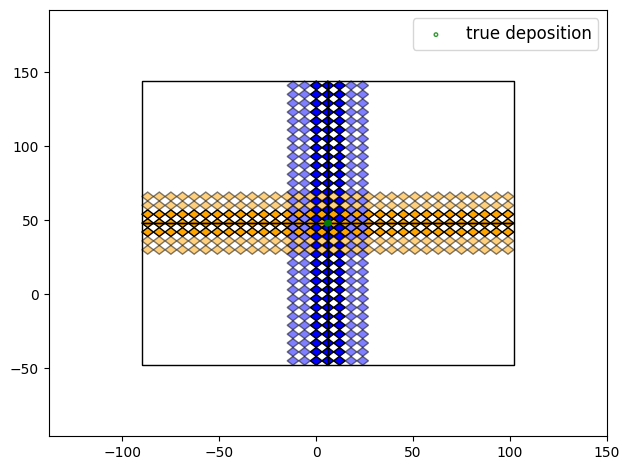

In [3]:
builder._plot_channels2D(truthDep=True)

In [4]:
cluster_x, cluster_y, cluster_E = builder.deposition_clustering(method='DBSCAN')
print(len(cluster_x))

1


In [3]:
from scripts.waveform_fit import fitter

fit = fitter(SamplingFrequency=2.0)
fit.load_diffusion_PDFs()

The diffusion PDFs loaded successfully!


In [4]:
from tqdm.notebook import tqdm

fit_x, fit_y, fit_t, fit_q, fit_evtid = [], [], [], [], []
fit2_x, fit2_y, fit2_t, fit2_q, fit2_evtid = [], [], [], [], []
fit3_x, fit3_y, fit3_t, fit3_q, fit3_evtid = [], [], [], [], []
depo_x, depo_y, true_q = [], [], []
depo2_x, depo2_y, true2_q = [], [], []
depo3_x, depo3_y, true3_q = [], [], []

for evtid in tqdm(range(50)):
    builder.get_mc_event(evtid)
    builder.group_channels()
    cluster_x, cluster_y, cluster_E = builder.deposition_clustering(method="DBSCAN")
    n_cluster = len(cluster_x)
    
    if n_cluster > 3:
        continue
    else:
        init_par = []
        for x, y, E in zip(cluster_x, cluster_y, cluster_E):
            init_par.append(x)
            init_par.append(y)
            init_par.append(10.)
            init_par.append(E)

        init_par = np.array(init_par)

        valid = False
        counter = 0
        while not valid :
            m = fit.multiChannel_variedCluster_fitting(builder.time_all, builder.wf_all, init_par, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all)
            valid = m.fmin.is_valid
            counter += 1
            init_par_new = []
            for val in init_par:
                val = np.random.uniform(val, 0.05*val)
                init_par_new.append(val)
            init_par_new = np.array(init_par_new)
            init_par = init_par_new
            if counter > 10:
                # Do not fit excess 10 times...
                valid = True
        
        if n_cluster == 1:
            fit_x.append(m.values[0] + builder.dx) 
            fit_y.append(m.values[1] + builder.dy) 
            fit_t.append(m.values[2]) 
            fit_q.append(m.values[3]) 
            fit_evtid.append(evtid)
        
            depo_x.append(cluster_x[0] + builder.dx)
            depo_y.append(cluster_y[0] + builder.dy)
            true_q.append(np.sum(builder.mc_event['q']))
        
        
        elif n_cluster == 2:
            fit2_x.append(m.values[0] + builder.dx)
            fit2_x.append(m.values[4] + builder.dx)
            fit2_y.append(m.values[1] + builder.dy)
            fit2_y.append(m.values[5] + builder.dy)
            fit2_q.append(m.values[3])
            fit2_q.append(m.values[7])
            fit2_evtid.append(evtid)

            depo2_x.append(cluster_x[0] + builder.dx)
            depo2_y.append(cluster_y[0] + builder.dy)
            depo2_x.append(cluster_x[1] + builder.dx)
            depo2_y.append(cluster_y[1] + builder.dy)
            true2_q.append(np.sum(builder.mc_event['q']))

        elif n_cluster == 3:
            fit3_x.append(m.values[0] + builder.dx)
            fit3_x.append(m.values[4] + builder.dx)
            fit3_x.append(m.values[8] + builder.dx)
            fit3_y.append(m.values[1] + builder.dy)
            fit3_y.append(m.values[5] + builder.dy)
            fit3_y.append(m.values[9] + builder.dy)
            fit3_q.append(m.values[3] )
            fit3_q.append(m.values[7] )
            fit3_q.append(m.values[11])
            fit3_evtid.append(evtid)

            depo3_x.append(cluster_x[0] + builder.dx)
            depo3_y.append(cluster_y[0] + builder.dy)
            depo3_x.append(cluster_x[1] + builder.dx)
            depo3_y.append(cluster_y[1] + builder.dy)
            depo3_x.append(cluster_x[2] + builder.dx)
            depo3_y.append(cluster_y[2] + builder.dy)
            true3_q.append(np.sum(builder.mc_event['q']))
            

  0%|          | 0/50 [00:00<?, ?it/s]

Total 7 x strips and 6 y strips.
During minuit construction, there are 2 clusters.
Total 11 x strips and 7 y strips.
During minuit construction, there are 3 clusters.
Total 6 x strips and 6 y strips.
During minuit construction, there are 1 clusters.
Total 6 x strips and 6 y strips.
During minuit construction, there are 1 clusters.
Total 7 x strips and 7 y strips.
Total 7 x strips and 9 y strips.
During minuit construction, there are 2 clusters.
Total 8 x strips and 7 y strips.
During minuit construction, there are 2 clusters.
Total 6 x strips and 6 y strips.
During minuit construction, there are 1 clusters.
Total 6 x strips and 6 y strips.
During minuit construction, there are 1 clusters.
Total 6 x strips and 6 y strips.
During minuit construction, there are 2 clusters.
Total 6 x strips and 6 y strips.
During minuit construction, there are 1 clusters.
W VariableMetricBuilder No improvement in line search
Total 6 x strips and 6 y strips.
During minuit construction, there are 2 clusters.

In [5]:
fit_q = np.array(fit_q)
fit2_q = np.array(fit2_q)
fit3_q = np.array(fit3_q)
true_q = np.array(true_q)


fit2_q_sum = fit2_q[::2] + fit2_q[1::2]
fit3_q_sum = fit3_q[::3] + fit3_q[1::3] + fit3_q[2::3]

fit_q = fit_q * 1e5
fit2_q_sum = fit2_q_sum * 1e5
fit3_q_sum = fit3_q_sum * 1e5

28


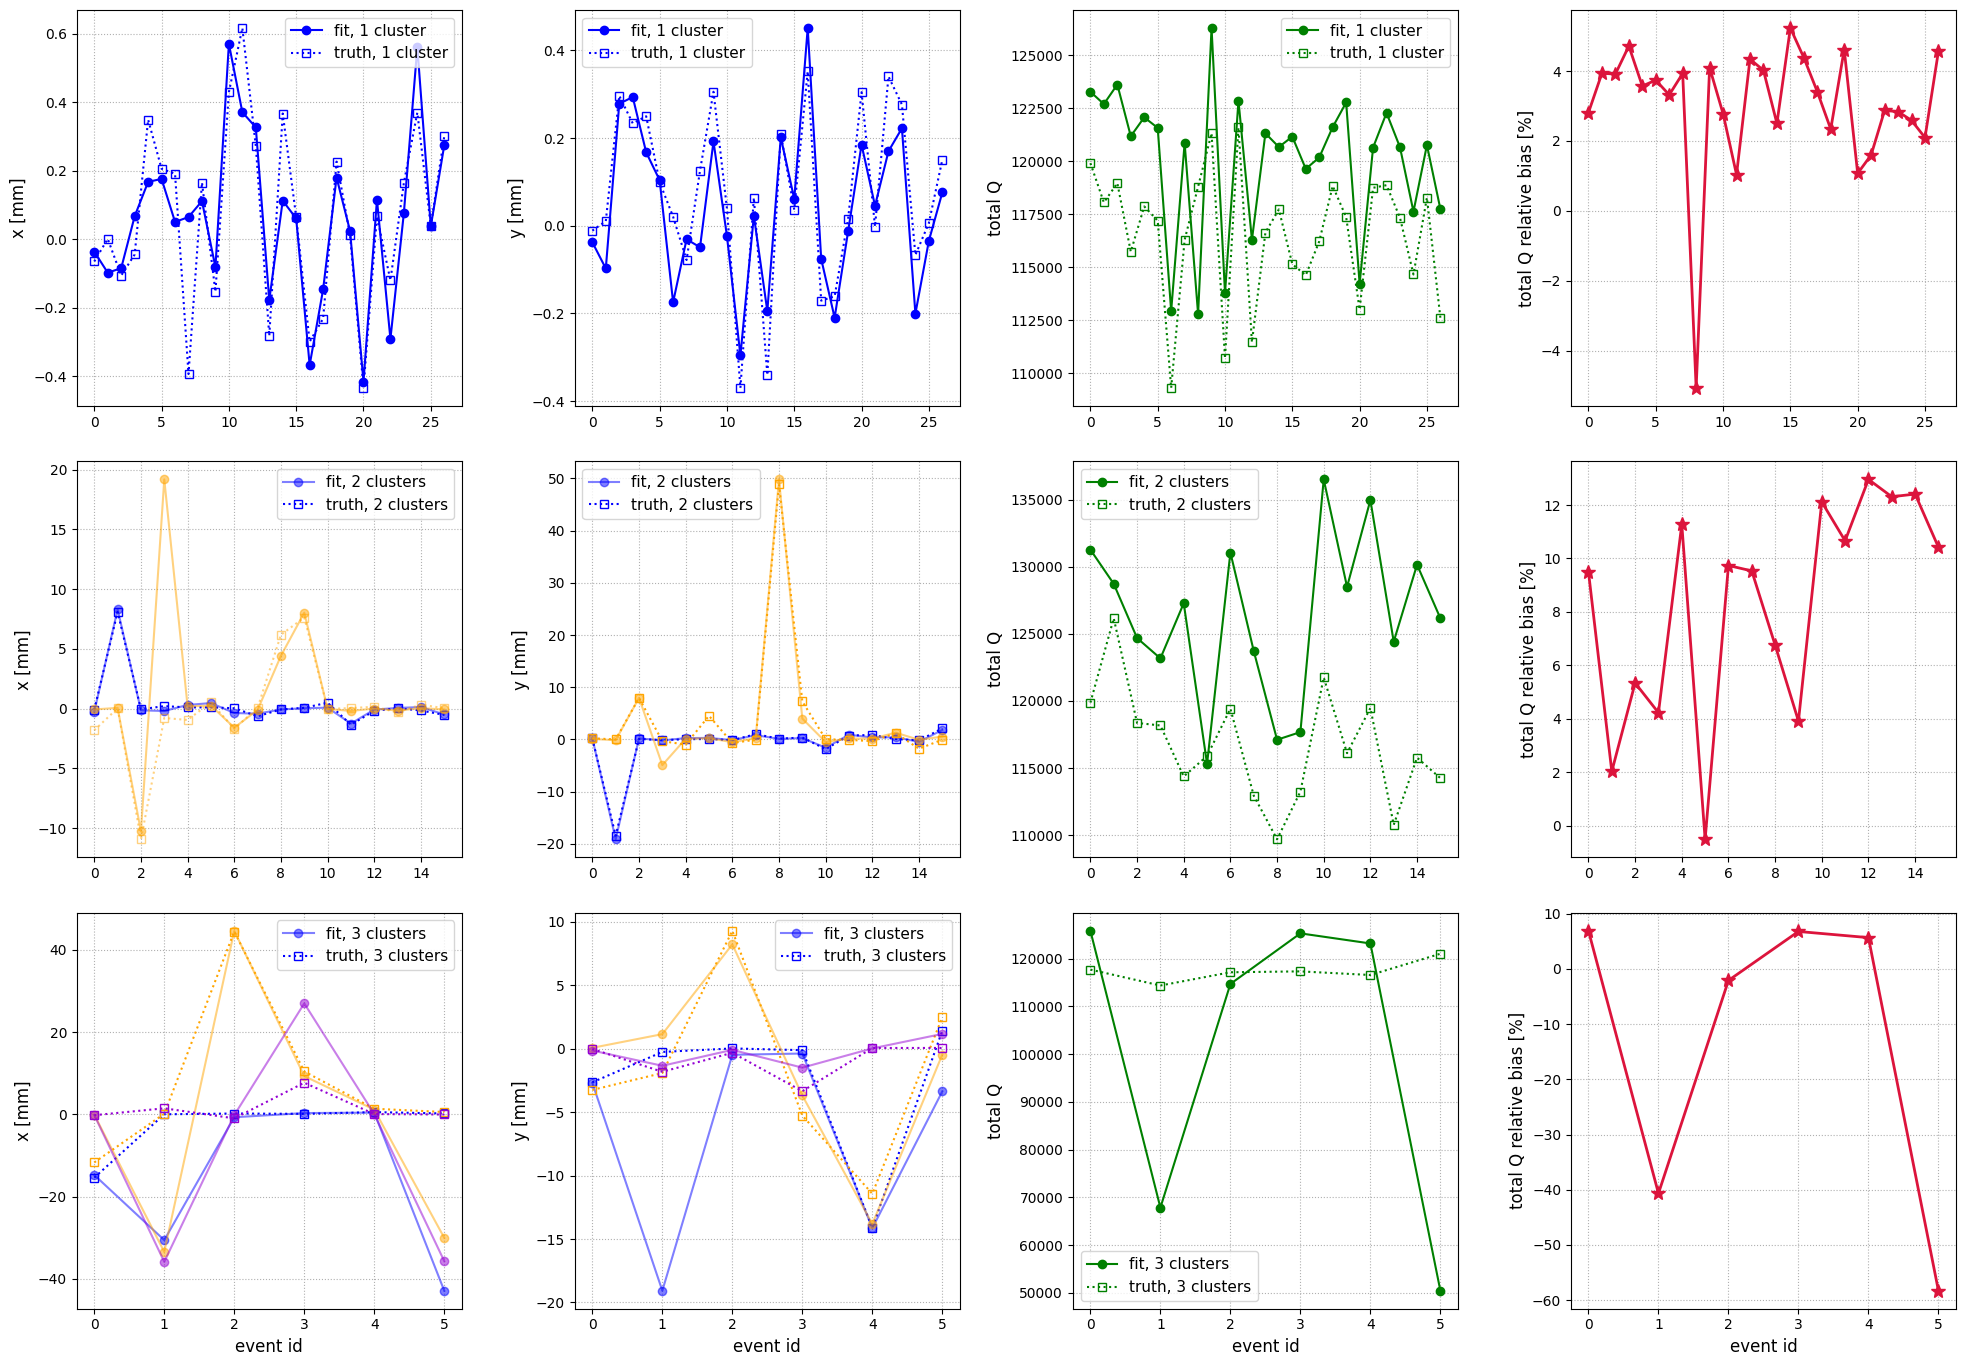

In [7]:
_, ax = plt.subplots(3, 4, figsize=(20, 14))

colors = ['blue', 'orange', 'darkviolet', 'green']

ax[0, 0].plot(fit_x, 'o-',  color=colors[0], label='fit, 1 cluster')
ax[0, 0].plot(depo_x, 's:', color=colors[0], fillstyle='none', label='truth, 1 cluster')
ax[0, 1].plot(fit_y, 'o-',  color=colors[0], label='fit, 1 cluster')
ax[0, 1].plot(depo_y, 's:', color=colors[0], fillstyle='none', label='truth, 1 cluster')
ax[0, 2].plot(fit_q, 'o-',  color=colors[3], label='fit, 1 cluster')
ax[0, 2].plot(true_q, 's:', color=colors[3], fillstyle='none', label='truth, 1 cluster')
ax[0, 3].plot((fit_q - true_q)/true_q*100, '*-', ms=10, lw=2, color='crimson')


ax[1, 0].plot(fit2_x[::2], 'o-', color=colors[0], label='fit, 2 clusters', alpha=0.5)
ax[1, 0].plot(depo2_x[::2], 's:', color=colors[0], fillstyle='none', label='truth, 2 clusters')
ax[1, 0].plot(fit2_x[1::2], 'o-', color=colors[1], alpha=0.5)
ax[1, 0].plot(depo2_x[1::2], 's:', color=colors[1], fillstyle='none', alpha=0.5)
ax[1, 1].plot(fit2_y[::2], 'o-', color=colors[0], label='fit, 2 clusters', alpha=0.5)
ax[1, 1].plot(depo2_y[::2], 's:', color=colors[0], fillstyle='none', label='truth, 2 clusters', )
ax[1, 1].plot(fit2_y[1::2], 'o-', color=colors[1], alpha=0.5)
ax[1, 1].plot(depo2_y[1::2], 's:', fillstyle='none', color=colors[1],)
ax[1, 2].plot(fit2_q_sum, 'o-', label='fit, 2 clusters', color=colors[3],)
ax[1, 2].plot(true2_q, 's:', fillstyle='none', label='truth, 2 clusters', color=colors[3],)
ax[1, 3].plot((fit2_q_sum - true2_q)/true2_q*100 ,'*-', ms=10, lw=2, color='crimson')



ax[2, 0].plot(fit3_x[::3], 'o-', color=colors[0], label='fit, 3 clusters', alpha=0.5)
ax[2, 0].plot(depo3_x[::3], 's:', color=colors[0], fillstyle='none', label='truth, 3 clusters')
ax[2, 0].plot(fit3_x[1::3], 'o-', color=colors[1],alpha=0.5)
ax[2, 0].plot(depo3_x[1::3], 's:', fillstyle='none', color=colors[1],)
ax[2, 0].plot(fit3_x[2::3], 'o-', color=colors[2],alpha=0.5)
ax[2, 0].plot(depo3_x[2::3], 's:', fillstyle='none', color=colors[2],)
ax[2, 1].plot(fit3_y[::3], 'o-', label='fit, 3 clusters',color=colors[0],alpha=0.5)
ax[2, 1].plot(depo3_y[::3], 's:', fillstyle='none', label='truth, 3 clusters', color=colors[0],)
ax[2, 1].plot(fit3_y[1::3], 'o-', color=colors[1], alpha=0.5)
ax[2, 1].plot(depo3_y[1::3], 's:', fillstyle='none', color=colors[1],)
ax[2, 1].plot(fit3_y[2::3], 'o-', color=colors[2], alpha=0.5)
ax[2, 1].plot(depo3_y[2::3], 's:', fillstyle='none', color=colors[2],)
ax[2, 2].plot(fit3_q_sum, 'o-', label='fit, 3 clusters', color=colors[3],)
ax[2, 2].plot(true3_q, 's:', label='truth, 3 clusters', color=colors[3], fillstyle='none')
ax[2, 3].plot((fit3_q_sum - true3_q)/true3_q*100 ,'*-', ms=10, lw=2, color='crimson')



for j in range(3):
    ax[j, 0].set_ylabel('x [mm]', fontsize=12)
    ax[j, 1].set_ylabel('y [mm]', fontsize=12)
    ax[j, 2].set_ylabel('total Q', fontsize=12)
    ax[j, 3].set_ylabel('total Q relative bias [%]', fontsize=12)
    
    for i in range(4):
        ax[2, i].set_xlabel('event id', fontsize=12)
        ax[j, i].tick_params(axis='both', labelsize=10)
        ax[j, i].grid(linestyle=':')
        if i != 3:
            ax[j, i].legend(prop={'size':11})
plt.tight_layout()

plt.savefig('../../../my_notes_slides/figures/Preliminary_fitting_50bb0nevents.png')

print(fit_evtid[15])

In [6]:
from tqdm.notebook import tqdm

n_cluster = len(cluster_x)
init_par = []
for x, y, E in zip(cluster_x, cluster_y, cluster_E):
    init_par.append(x)
    init_par.append(y)
    init_par.append(10.)
    init_par.append(E)

init_par = np.array(init_par)

print(init_par)

valid = False
counter = 0
while not valid :
    m = fit.multiChannel_variedCluster_fitting(builder.time_all, builder.wf_all, init_par, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all)
    valid = m.fmin.is_valid
    counter += 1
    init_par_new = []
    for val in init_par:
        val = np.random.uniform(val, 0.05*val)
        init_par_new.append(val)
    init_par_new = np.array(init_par_new)
    init_par = init_par_new
    if counter > 10:
        # Do not fit excess 10 times...
        valid = True

[5.60669476e+00 4.79217991e+01 1.00000000e+01 2.68622941e-02]
During minuit construction, there are 1 clusters.


In [7]:
m

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6480                       │              Nfcn = 127              │
│ EDM = 1.52e-05 (Goal: 0.0002)    │            time = 0.8 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │   6.065   │   0.005   │            │            │-14.3933 │ 25.6067 │       │
│ 1 │ x1   │  47.969   │   0.005   │            │            │ 27.9218 │ 67.9218 │       │
│ 2 │ x2   │  10.441   │   0.004   │            │            │    0    │   20    │       │
│ 3 │ x3   │  1.2087   │  0.0029   │            │            │    0    │    2    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────┐
│    │        x0        x1        x2        x3 │
├────┼─────────────────────────────────────────┤
│ x0 │  2.26e-05 -0.002e-3         0     -0e-6 │
│ x1 │ -0.002e-3  2.25e-05         0     -0e-6 │
│ x2 │         0         0  1.43e-05     -1e-6 │
│ x3 │     -0e-6     -0e-6     -1e-6  8.36e-06 │
└────┴─────────────────────────────────────────┘

In [7]:
# initial paramters for 1 cluster:
init_par = np.array([np.mean(builder.x_cross), np.mean(builder.y_cross), 10, 1.0])

In [8]:
m = fit.multiChannel_variedCluster_fitting(builder.time_all, builder.wf_all, init_par, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all)

During minuit construction, there are 1 clusters.


In [7]:
idx = 0
_ = fit.multiChannel_variedCluster_plotting(builder.time_all, builder.wf_all, m_list[idx].values, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all, builder.charge_all);

NameError: name 'm_list' is not defined

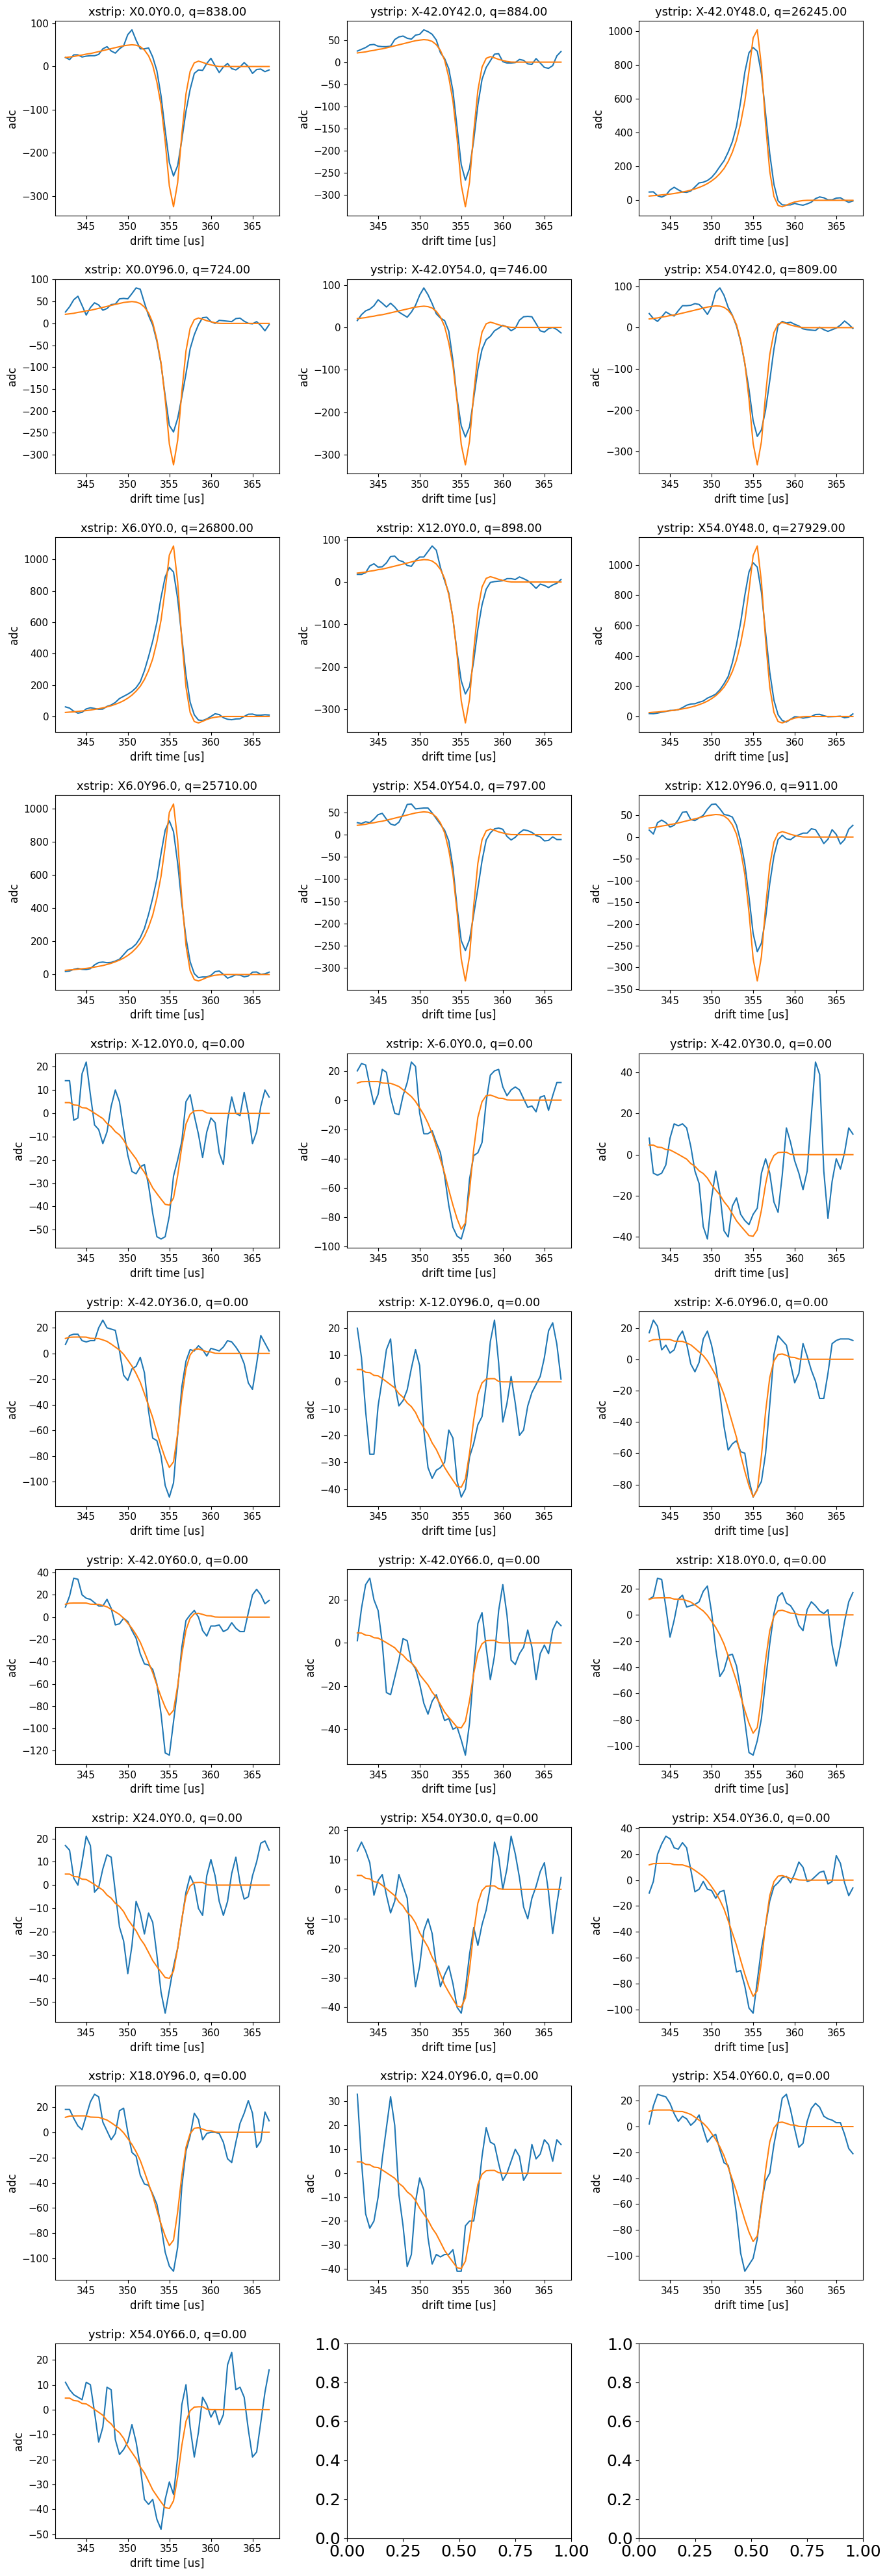

In [8]:
_ = fit.multiChannel_variedCluster_plotting(builder.time_all, builder.wf_all, m.values, builder.strip_x_all, builder.strip_y_all, builder.ystrip_flag_all, builder.charge_all);

In [11]:
import matplotlib.pyplot as plt
def compare_model_results(m_list):
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    for m in m_list:
        vals = m.values
        x = vals[::4]
        y = vals[1::4]
        t = vals[2::4]
        q = vals[3::4]
        print(f'Fitting charge is {np.sum(q)*1e5:.3f}.')
        ax[0, 0].hist(x, bins=10, histtype='step', label=f'{len(x)}-cluster')
        ax[0, 1].hist(y, bins=10, histtype='step', label=f'{len(x)}-cluster')
        ax[1, 0].hist(t, range=(9, 12),  bins=10, histtype='step', label=f'{len(x)}-cluster')
        ax[1, 1].hist(q, range=(0, 2),   bins=10, histtype='step', label=f'{len(x)}-cluster')

    ax[0, 0].set_xlabel('x [mm]', fontsize=13)
    ax[0, 1].set_xlabel('y [mm]', fontsize=13)
    ax[1, 0].set_xlabel('t [us]', fontsize=13)
    ax[1, 1].set_xlabel('q/1e5',  fontsize=13)
    ax[0, 0].tick_params(axis='both', labelsize=13)
    ax[0, 1].tick_params(axis='both', labelsize=13)
    ax[1, 0].tick_params(axis='both', labelsize=13)
    ax[1, 1].tick_params(axis='both', labelsize=13)
    ax[0, 0].legend(prop={'size':11})
    
    plt.tight_layout()
    
    return fig
            

In [44]:
print(f'The true charge of this event is {np.sum(builder.mc_event['q']):.3f}.')
q = m.values[3::4]
print(f'The fitting charge is {np.sum(q)*1e5:.3f}')
#compare_model_results(m_list);

The true charge of this event is 115145.180.
The fitting charge is 38754.539


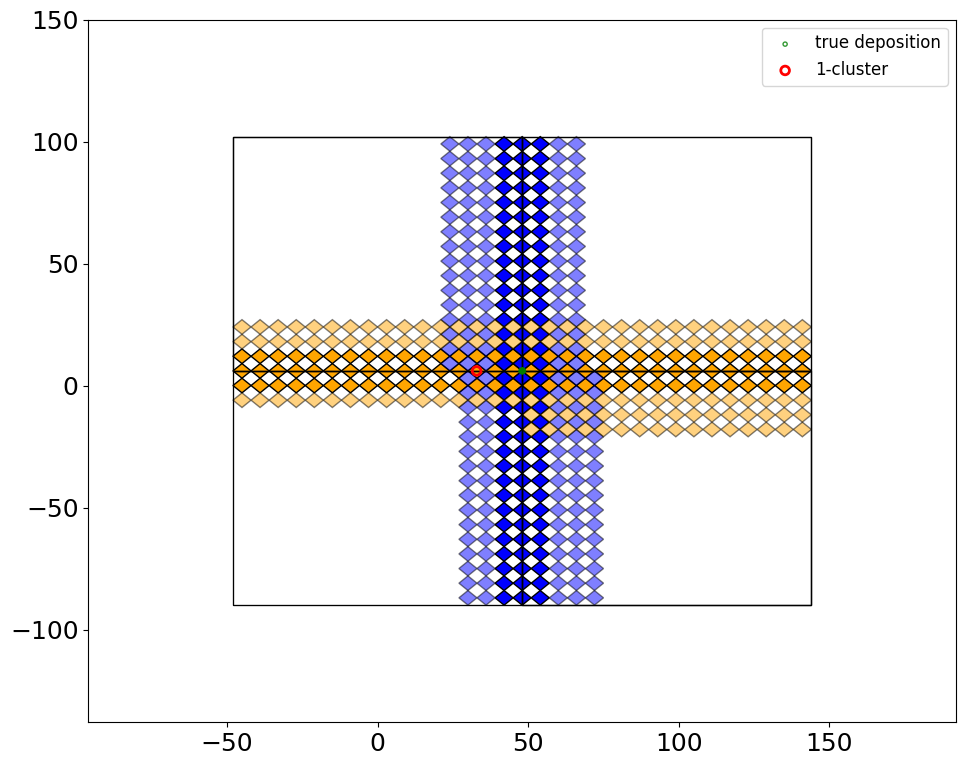

In [45]:
import numpy as np

fit_x, fit_y, fit_q = [], [], []
x, y, q = [], [], []
N_par = int(len(m.values) / 4)
for i_par in range(N_par):
    x.append(m.values[0+i_par*4])
    y.append(m.values[1+i_par*4])
    q.append(m.values[3+i_par*4])
x = np.array(x)
y = np.array(y)
q = np.array(q)
fit_x.append(x)
fit_y.append(y)
fit_q.append(q)
builder._plot_channels2D(fit_x, fit_y, fit_q, truthDep=True)

In [57]:
fit_q = np.array(fit_q)
true_q = np.array(true_q)

bias = (fit_q*1e5 - true_q) / true_q
print(fit_q)
print(true_q)
print(bias)

[1.18975026 1.1831859  1.1924566  1.16880592 1.17799438 1.16503644
 1.08920301 1.16604646 1.08908171 1.21816123 1.09793674 1.18526169
 1.12168734 1.17045111 1.16435452 1.16856656 1.15414549 1.15934764
 1.17278828 1.18443802 1.10194467 1.16412181 1.18017281 1.16401089
 1.13513828 1.16541262 1.13588018]
[119914.7   118056.66  118971.484 115730.62  117869.46  117197.95
 109301.77  116293.05  118800.92  121325.02  110700.945 121599.49
 111458.02  116635.37  117729.97  115145.18  114622.25  116219.086
 118837.36  117363.87  113001.15  118750.86  118873.66  117332.11
 114657.29  118286.96  112606.984]
[-0.00783621  0.00221871  0.00230455  0.00993665 -0.00059408 -0.00592424
 -0.00349008  0.00267943 -0.08327167  0.0040478  -0.0081957  -0.02527415
  0.00637648  0.00351303 -0.01099564  0.01486364  0.00691226 -0.00244643
 -0.01311483  0.00920159 -0.02483764 -0.01969399 -0.00720408 -0.00793492
 -0.00997286 -0.01475817  0.00871201]
